In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.134,), (0.217,))])

# Create training set and define training dataloader
training_data = torchvision.datasets.MNIST(root="MNIST_data", train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(training_data, batch_size=64, shuffle=True)

# Create test set and define test dataloader
test_data =torchvision.datasets.MNIST(root="MNIST_data", train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15798854.01it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 491203.49it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4384714.25it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3352195.81it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)


    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

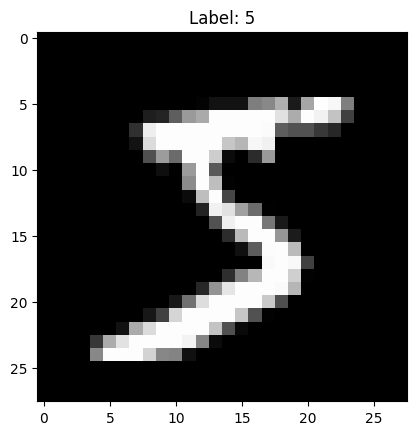

In [4]:
sample_image, sample_label = training_data[0]
sample_image_np = np.array(sample_image)
#plot Image
plt.imshow(sample_image_np.squeeze(), cmap="gray")
plt.title(f"Label: {sample_label}")
plt.show()

In [5]:
sample_image_tensor = torch.Tensor(sample_image)
print(f"Tensor shape: {sample_image_tensor.shape}")
print(f"Dataset size: {len(training_data)}")
print(f"Number of classes: {len(training_data.classes)}")
print(f"Image shape: {training_data[0][0].shape}")

Tensor shape: torch.Size([1, 28, 28])
Dataset size: 60000
Number of classes: 10
Image shape: torch.Size([1, 28, 28])


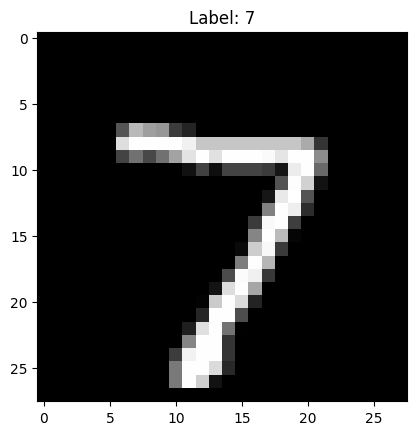

In [6]:
sample_image, sample_label = test_data[0]
sample_image_np = np.array(sample_image)
#plot Image
plt.imshow(sample_image_np.squeeze(), cmap="gray")
plt.title(f"Label: {sample_label}")
plt.show()

In [7]:
sample_image_tensor = torch.Tensor(sample_image)
print(f"Tensor shape: {sample_image_tensor.shape}")
print(f"Dataset size: {len(test_data)}")
print(f"Number of classes: {len(test_data.classes)}")
print(f"Image shape: {test_data[0][0].shape}")

Tensor shape: torch.Size([1, 28, 28])
Dataset size: 10000
Number of classes: 10
Image shape: torch.Size([1, 28, 28])


6


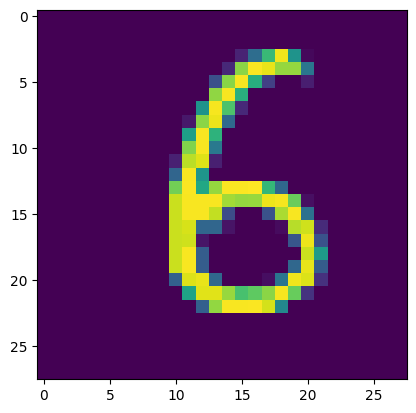

5


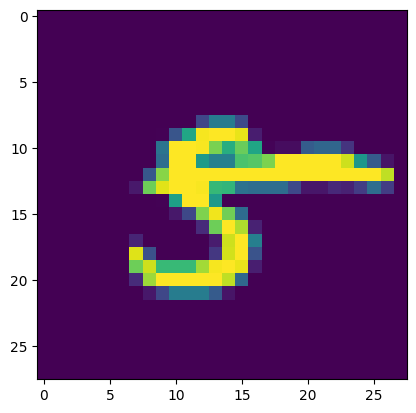

0


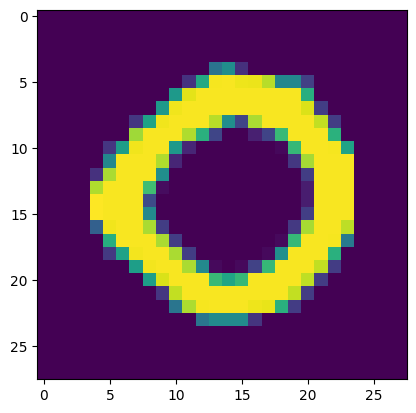

3


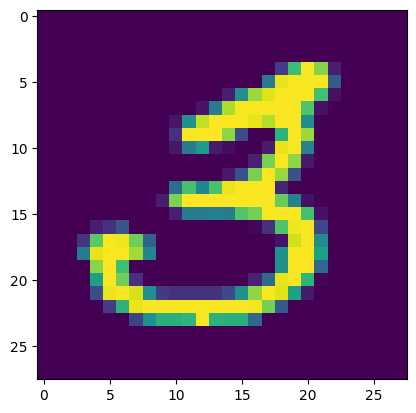

3


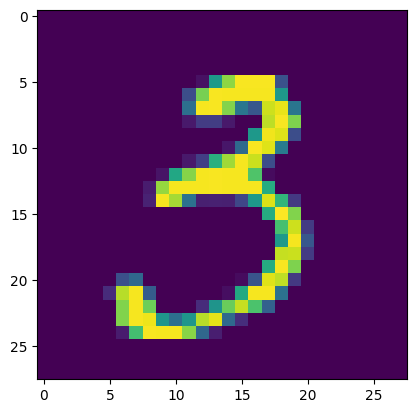

In [8]:
# Explore data
show5(train_loader)

7


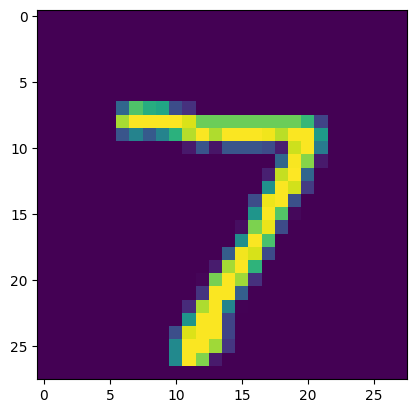

2


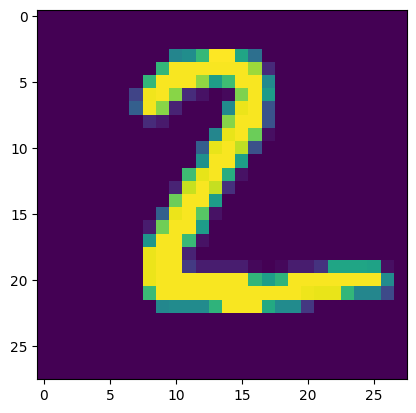

1


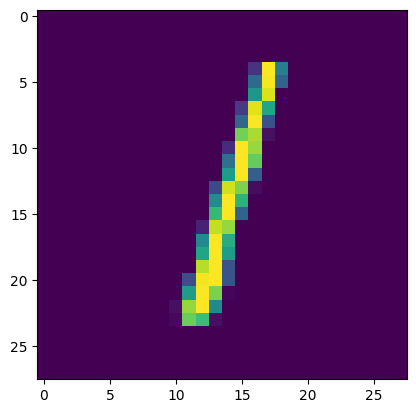

0


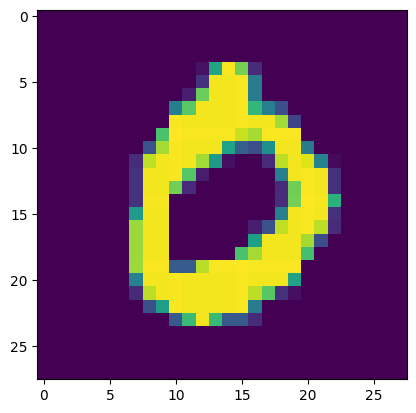

4


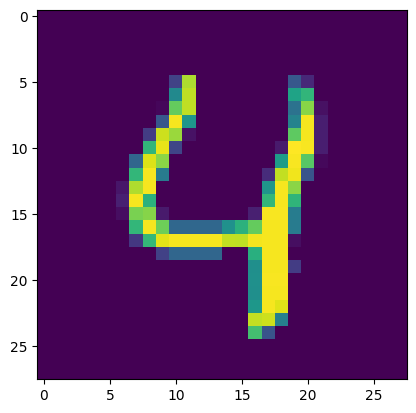

In [9]:
show5(test_loader)

 Neural Network

In [10]:
## YOUR CODE HERE ##
# Define the class for your neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28*28, 528)
        self.fc2 = nn.Linear(528, 247)
        self.fc3 = nn.Linear(247, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x

In [11]:
## YOUR CODE HERE ##
model = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001,momentum=0.9)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=528, bias=True)
  (fc2): Linear(in_features=528, out_features=247, bias=True)
  (fc3): Linear(in_features=247, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [12]:
## YOUR CODE HERE ##
num_epochs = 10

# Establish a list for our history
train_loss_history = list()

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {(train_correct/len(training_data))*100:.2f}% training loss: {train_loss/len(training_data):.5f}')
    train_loss_history.append(train_loss/len(training_data))

Epoch 1 training accuracy: 74.22% training loss: 0.01449
Epoch 2 training accuracy: 91.55% training loss: 0.00457
Epoch 3 training accuracy: 93.63% training loss: 0.00345
Epoch 4 training accuracy: 94.88% training loss: 0.00276
Epoch 5 training accuracy: 95.71% training loss: 0.00228
Epoch 6 training accuracy: 96.50% training loss: 0.00192
Epoch 7 training accuracy: 96.99% training loss: 0.00165
Epoch 8 training accuracy: 97.31% training loss: 0.00144
Epoch 9 training accuracy: 97.68% training loss: 0.00126
Epoch 10 training accuracy: 97.96% training loss: 0.00111


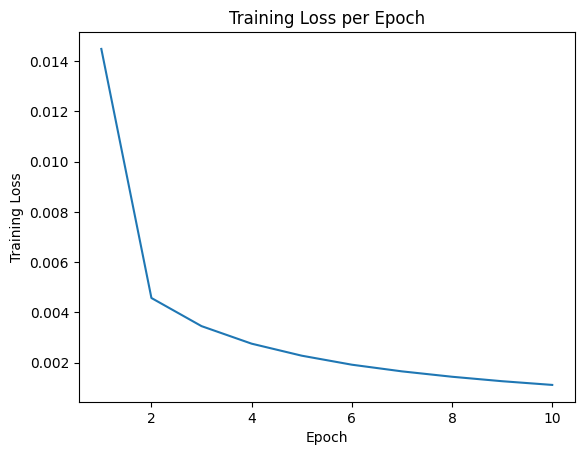

In [13]:
## YOUR CODE HERE ##

# Plotting the train_loss_history
plt.plot(range(1, num_epochs + 1), train_loss_history)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss per Epoch')
plt.show()

Testing Model

In [14]:
## YOUR CODE HERE ##
test_correct = 0
test_loss = 0.0
model.eval()
for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)

    outputs = model(inputs)
    loss = criterion(outputs, labels)

    _, preds = torch.max(outputs.data, 1)
    test_correct += (preds == labels).sum().item()
    test_loss += loss.item()
print(f'test accuracy: {(test_correct/len(test_data))*100:.2f}% test loss: {test_loss/len(test_data):.5f}')

test accuracy: 97.10% test loss: 0.00141


In [15]:
## YOUR CODE HERE ##
optimizer = optim.Adam(model.parameters(), lr=0.001)
## YOUR CODE HERE ##
num_epochs = 10

# Establish a list for our history
train_loss_history = list()

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {(train_correct/len(training_data))*100:.2f}% training loss: {train_loss/len(training_data):.5f}')
    train_loss_history.append(train_loss/len(training_data))

Epoch 1 training accuracy: 95.48% training loss: 0.00229
Epoch 2 training accuracy: 97.30% training loss: 0.00135
Epoch 3 training accuracy: 97.86% training loss: 0.00105
Epoch 4 training accuracy: 98.26% training loss: 0.00085
Epoch 5 training accuracy: 98.66% training loss: 0.00065
Epoch 6 training accuracy: 98.79% training loss: 0.00061
Epoch 7 training accuracy: 98.91% training loss: 0.00053
Epoch 8 training accuracy: 99.06% training loss: 0.00047
Epoch 9 training accuracy: 99.14% training loss: 0.00042
Epoch 10 training accuracy: 99.17% training loss: 0.00040


In [16]:
## Test set fitting ##
test_correct = 0
test_loss = 0.0
model.eval()
for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)

    outputs = model(inputs)
    loss = criterion(outputs, labels)

    _, preds = torch.max(outputs.data, 1)
    test_correct += (preds == labels).sum().item()
    test_loss += loss.item()
print(f'test accuracy: {(test_correct/len(test_data))*100:.2f}% test loss: {test_loss/len(test_data):.5f}')

test accuracy: 97.69% test loss: 0.00139


In [17]:
## YOUR CODE HERE ##
torch.save(model.state_dict(),"model.pth")